In [35]:
import numpy as np
from scipy.stats import norm
import random
import matplotlib.pyplot as plt

In [2]:
N = norm.cdf

In [3]:
# a fair price of European style put option according to Black-Scholes framework

def put_option(K, S0, r, sigm, T):
    d1 =  (np.log(S0/K) + (r + (sigm**2) / 2)*T) / (sigm*np.sqrt(T))

    d2 = d1 - sigm*np.sqrt(T)

    p = K * np.exp(-r*T) * N(-d2) - S0 * N(-d1)

    return p

In [4]:
# a fair price of European style put option according to Black-Scholes framework

def call_option(K, S0, r, sigm, T):
    d1 =  (np.log(S0/K) + (r + (sigm**2) / 2)*T) / (sigm*np.sqrt(T))

    d2 = d1 - sigm*np.sqrt(T)

    p =  S0 * N(d1) - K * np.exp(-r*T) * N(d2)

    return p

In [5]:
p = put_option(50, 50, 0.1, 0.3, 0.25)
print(f"Put option price: {p}")

Put option price: 2.3759406675006467


In [6]:
p = put_option(50, 48.52, 0.1, 0.3, 0.25)
print(f"Put option price: {p}")

Put option price: 3.0325113365550607


## Geometric Brownian Motion (GBM) Model

We model the stock price \( S_t \) under the **risk–neutral measure** as the stochastic differential equation (SDE):

$$
dS_t = r S_t \, dt + \sigma S_t \, dW_t
$$

where:
- $S_t$ — asset price at time t
- $r$ — constant risk-free interest rate
- $\sigma$ — volatility (standard deviation of returns)
- $W_t$ — standard Brownian motion (Wiener process)

---

### Exact solution

Over a small time step \(\Delta t\), the **exact** GBM solution is:

$$
S_{t+\Delta t} = S_t \cdot \exp\left[ \left( r - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} \, Z \right]
$$

where:
- $Z \sim \mathcal{N}(0,1)$ is a standard normal random variable  
- $\left( r - \frac{1}{2} \sigma^2 \right) \Delta t$ is the deterministic drift  
- $\sigma \sqrt{\Delta t} \, Z$ is the random shock from Brownian motion increments $\Delta W_t\$

---

**Parameters in the solution:**
- $S_0$: initial asset price at t = 0
- r: risk-free interest rate (controls average growth rate under risk-neutral measure)  
- $\sigma$: volatility (controls magnitude of randomness)  
- $\Delta t$: time step size (in years)  
- $Z$: standard normal random variable representing the shock in each step

In [50]:
def mc_pricing(S0, r, sigm, T, N):
    dt = T/ N
    
    rng = np.random.default_rng()
    prices = [S0]

    price = S0
    for _ in range(N):
        z = rng.standard_normal()
        price  *= np.exp( (r - 0.5 * sigm**2) *dt + np.sqrt(dt) * z * sigm )
        prices.append(price)

    return np.array(prices)

In [67]:
S0 = 3.03
r = 0.1
sigm = 0.3
T = 0.25
N = 1000

prices = mc_pricing(S0, r, sigm, T, N)

In [68]:
print(f"The mean value of MC simulated option price: {prices.mean()}")

The mean value of MC simulated option price: 2.9050811227118953


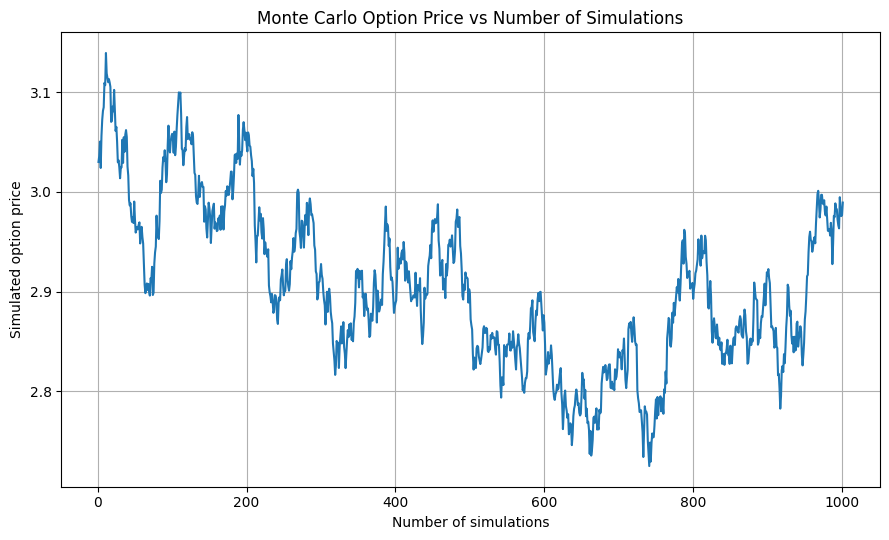

In [69]:
plt.figure(figsize=(9, 5.5))
plt.plot( np.arange(1, N+2), prices)

plt.title("Monte Carlo Option Price vs Number of Simulations")
plt.xlabel("Number of simulations")
plt.ylabel("Simulated option price")
plt.grid(True)
plt.tight_layout()
plt.show()